### some useful functions to figure out which settings to use

In [23]:
from nbodykit.cosmology import Planck15
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def a2z(a):
    return 1./a-1

def z2a(z):
    return 1./(1.+z)

In [25]:
def get_physical_width(cosmology,z_source,fov):
    """returns physical extent (comoving angular diameter distance) in Mpc/h 
    of a field of view (fov,in degrees) 
    at source redhsift z_source for a specific cosmology"""
    chi_source = cosmology.angular_diameter_distance(z_source)
    fov_rad    = fov/180.*np.pi
    width      = fov_rad*chi_source
    
    return width*(1+z_source)

In [26]:
def get_volume(z_source,FOV, cosmo):
    """
    returns the comoving volume of the lightcone in [Mpc/h]^3
    z_source: highest source redshift
    FOV: field of view in degrees (2D, in degrees)
    """
    h = cosmo.comoving_distance(z_source)
    ls= [deg/180.*np.pi*h for deg in FOV]
    V = np.prod(ls)*h/3.
    return V

In [27]:
def get_fov(cosmo,BoxSize,z_source):
    """
    get the field of view (in degrees) for given boxsize and source redshift
    """
    chi_source = cosmo.angular_diameter_distance(z_source)*(1+z_source)
    fov        = BoxSize/chi_source/np.pi*180.
    return fov

In [28]:
def get_num_boxes(cosmo, boxsize, z_source):
    """
    number of box repetitions up source redshift
    """
    h   = cosmo.comoving_distance(z_source)
    num = h/boxsize
    return num

In [29]:
cosmo_fid  = Planck15
cosmo_min  = Planck15.match(Omega0_m=0.05)
cosmo_max  = Planck15.match(Omega0_m=0.95)
boxsize    = 156
z_source   = 1.

print(get_fov(cosmo_fid,boxsize,z_source))
print(get_fov(cosmo_min,boxsize,z_source))
print(get_fov(cosmo_max,boxsize,z_source))

print(get_num_boxes(cosmo_fid,boxsize,z_source))
print(get_num_boxes(cosmo_min,boxsize,z_source))
print(get_num_boxes(cosmo_max,boxsize,z_source))

3.885479663282639
3.171171050261748
5.018371727603926
14.746127757280815
18.067703886803148
11.417205146484276


In [30]:
cosmo_fid  = Planck15
cosmo_min  = Planck15.match(Omega0_m=0.05)
cosmo_max  = Planck15.match(Omega0_m=0.95)
boxsize    = 256
z_source   = 1.

print(get_fov(cosmo_fid,boxsize,z_source))
print(get_fov(cosmo_min,boxsize,z_source))
print(get_fov(cosmo_max,boxsize,z_source))

print(get_num_boxes(cosmo_fid,boxsize,z_source))
print(get_num_boxes(cosmo_min,boxsize,z_source))
print(get_num_boxes(cosmo_max,boxsize,z_source))

6.3761717551304855
5.20397300555774
8.235276681196186
8.985921602092997
11.010007056020669
6.957359386138855


In [31]:
#cosmo_fid  = Planck15


In [32]:
#S_8 at fiducial
def S_8(Omega_m, sigma_8):
    return sigma_8*(Omega_m/0.3)**0.5

def sigma_8(Omega_m,S_8_fid):
    return S_8_fid*(Omega_m/0.3)**(-0.5)

In [33]:
S_8_fid = S_8(Planck15.Omega_m(0),Planck15.sigma8)

In [34]:
sigma_Omega=0.015

In [35]:
Omega_m_min =Planck15.Omega_m(0)-5*sigma_Omega
Omega_m_max =Planck15.Omega_m(0)+5*sigma_Omega
print(Omega_m_min,Omega_m_max)

0.2339037414433296 0.3839037414433296


In [36]:
Omega_ms = np.linspace(Omega_m_min,Omega_m_max,100*100)

In [37]:
sigma8s  = sigma_8(Omega_ms,S_8_fid)

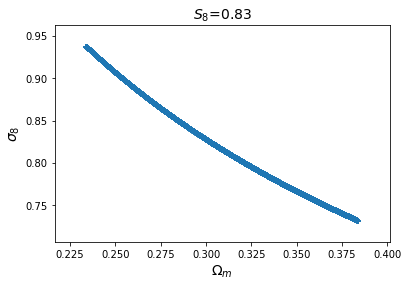

In [38]:
plt.title('$S_8$=%.2f'%S_8_fid, fontsize=14)
plt.scatter(Omega_ms,sigma8s, marker='+')
plt.ylabel('$\sigma_8$',fontsize=14)
plt.xlabel('$\Omega_m$',fontsize=14)
plt.show()

In [39]:
cosmo_min  = Planck15.match(Omega0_m=Omega_m_min)
cosmo_max  = Planck15.match(Omega0_m=Omega_m_max)
boxsize    = 256
z_source   = 1.

fov_min = get_fov(cosmo_min,boxsize,z_source)
fov_max = get_fov(cosmo_max,boxsize,z_source)

num_box_min = get_num_boxes(cosmo_min,boxsize,z_source)
num_box_max = get_num_boxes(cosmo_max,boxsize,z_source)

In [40]:
print(fov_min,fov_max)

6.083865443152263 6.644529860656505


In [41]:
import pickle

In [42]:
path = '/global/homes/v/vboehm/codes/MADLens/run_specs/'


In [43]:
from scipy.interpolate import interp1d

24


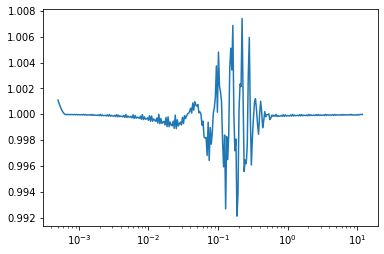

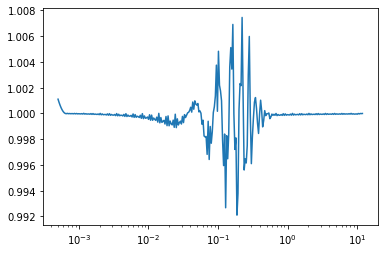

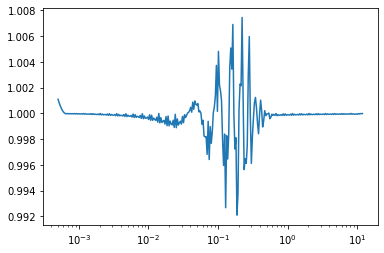

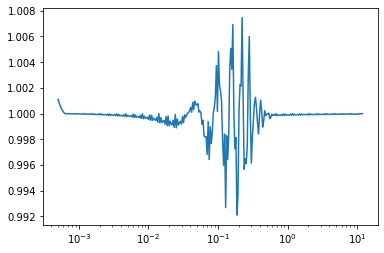

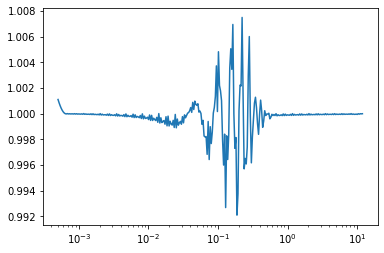

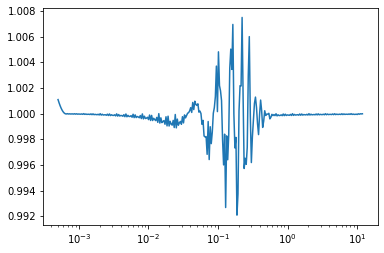

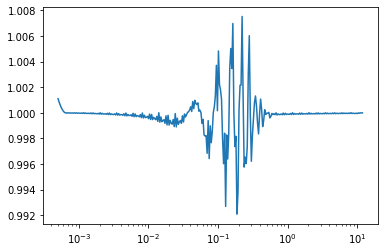

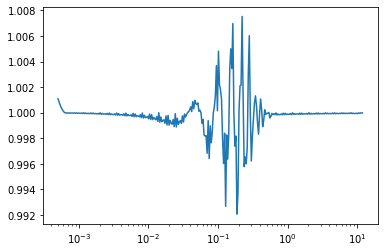

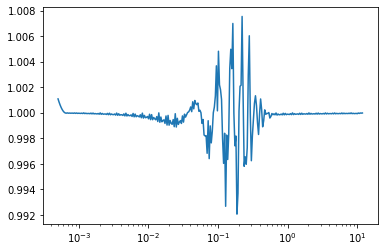

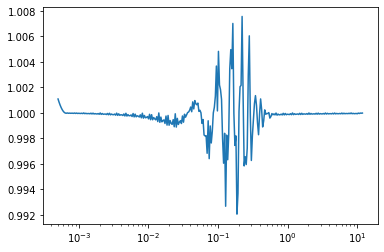

25


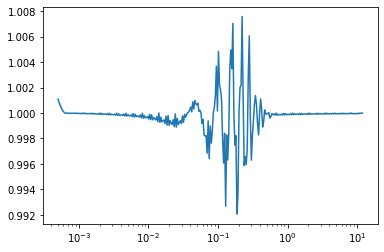

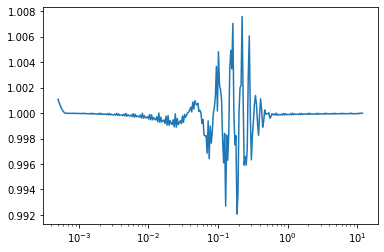

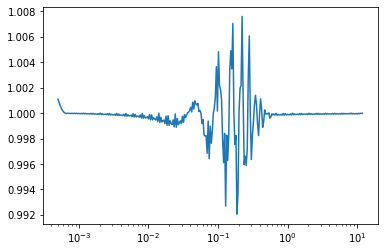

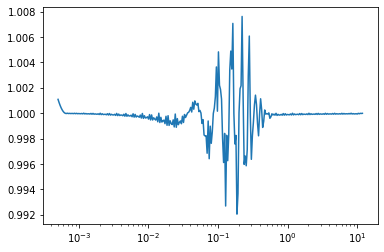

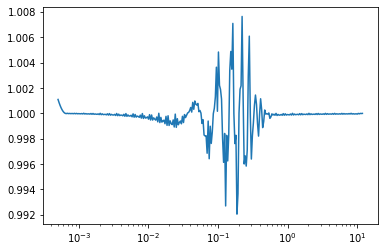

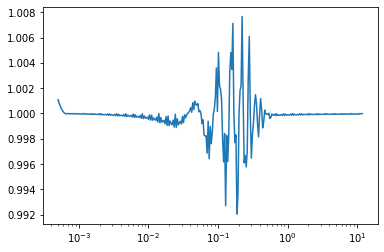

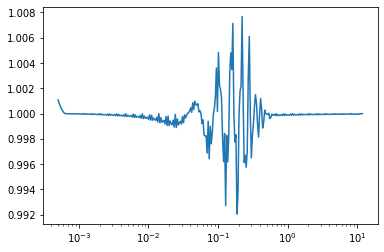

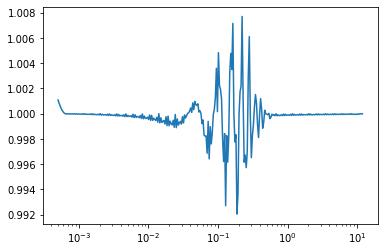

26


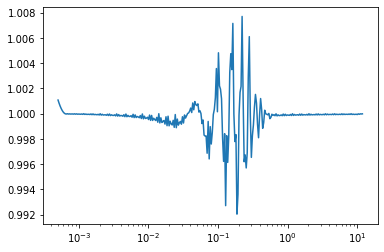

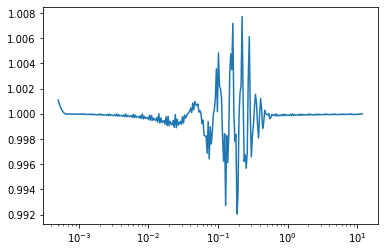

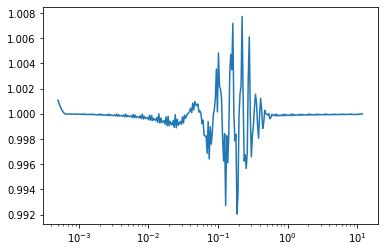

In [ ]:
for ii in range(100):
    try:
        _ = pickle.load(open(path+'S_8_small_run_%d.pkl'%ii,'rb'))
    except:
        print(ii)
        Pk_interp=[]
        for nn, (Omega_m, sigma8) in enumerate(zip(Omega_ms[ii*100:(ii+1)*100],sigma8s[ii*100:(ii+1)*100])):
            cosmo = Planck15.match(Omega0_m=Omega_m)
            cosmo = cosmo.match(sigma8=sigma8)
            ks    = np.logspace(-3.2,2.5,170)
            Pk    = cosmo.get_pklin(ks,0)
            Pk_interp+=[interp1d(np.log(ks),np.log(Pk),fill_value='extrapolate')]
            if nn%10==0:
                ks_test = np.logspace(-3.3,2.6,400)
                plt.semilogx(ks_test, np.exp(Pk_interp[-1](np.log(ks_test)))/cosmo.get_pklin(ks_test,0))
                plt.show()
        pickle.dump([fov_min,fov_max,Omega_ms,sigma8s,ks,Pk_interp],open(path+'S_8_small_run_%d.pkl'%ii,'wb'))